In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix



In [4]:
#Cargamos el Dataset
df = pd.read_csv('C:/Users/Fer/Documents/Fernando/archivospython/medicaldata.csv', sep=';')
#Visualizamos el Dataset
df

,amount_paid_to_date,number_presc_to_date,max_presc_to_date,max_presc_per_doctor,max_presc_per_hospital,max_presc_per_year,id,FRAUD_LABEL,amount_paid_per_year,amount_paid_per_hospital,amount_paid_per_doctor,amount_paid_to_prescription,amount_paid_total,number_presc_per_year,number_presc_per_hospital,number_presc_per_doctor,number_presc_to_prescription,number_presc_total
0,100.000000,0,1,1,0,0,21,False,109.111328,71.316356,24.658738,40.935309,400.000000,120,37,30,35,400
1,100.588010,9,1,1,9,9,34,False,0.942975,48.316478,27.854219,24.471927,402.352042,285,55,35,46,402
2,100.402561,0,1,1,0,0,35,False,159.592229,53.969161,26.888177,37.658748,401.610244,156,64,21,32,402
3,100.000000,3,1,1,84,9,38,False,59.203803,43.843904,48.933583,19.248757,400.000000,253,27,35,46,400
4,100.000000,22,1,1,22,22,24,False,95.780922,38.195557,43.876891,40.236061,400.000000,206,47,49,46,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,146.540802,32,0,1,1282,99,144,True,240.145667,85.091294,59.004133,59.828409,586.163207,296,44,26,62,586
196,166.996236,31,1,1,565,99,144,True,283.382510,47.368773,34.592914,66.190017,667.984946,377,59,82,68,668
197,129.295911,16,0,3,58,1193,174,True,27.152371,74.000566,37.857469,55.689913,517.183644,157,40,48,56,517
198,117.001118,11,0,1,13,46,174,True,191.312658,66.191091,52.319587,37.414503,468.004471,189,54,28,43,468


In [18]:
df.shape

(101, 18)

In [5]:
# Validamos Nulos nuevamente de otra manera por las dudas
nulos = df.isnull().sum()

# mostrar los valores nulos
print(nulos)

amount_paid_to_date             0
number_presc_to_date            0
max_presc_to_date               0
max_presc_per_doctor            0
max_presc_per_hospital          0
max_presc_per_year              0
id                              0
FRAUD_LABEL                     0
amount_paid_per_year            0
amount_paid_per_hospital        0
amount_paid_per_doctor          0
amount_paid_to_prescription     0
amount_paid_total               0
number_presc_per_year           0
number_presc_per_hospital       0
number_presc_per_doctor         0
number_presc_to_prescription    0
number_presc_total              0
dtype: int64


In [7]:
#Cambiamos True o Flase por 1 o 0
df['FRAUD_LABEL'] = df['FRAUD_LABEL'].factorize(['True','False'])[0]
df

,amount_paid_to_date,number_presc_to_date,max_presc_to_date,max_presc_per_doctor,max_presc_per_hospital,max_presc_per_year,id,FRAUD_LABEL,amount_paid_per_year,amount_paid_per_hospital,amount_paid_per_doctor,amount_paid_to_prescription,amount_paid_total,number_presc_per_year,number_presc_per_hospital,number_presc_per_doctor,number_presc_to_prescription,number_presc_total
0,100.000000,0,1,1,0,0,21,0,109.111328,71.316356,24.658738,40.935309,400.000000,120,37,30,35,400
1,100.588010,9,1,1,9,9,34,0,0.942975,48.316478,27.854219,24.471927,402.352042,285,55,35,46,402
2,100.402561,0,1,1,0,0,35,0,159.592229,53.969161,26.888177,37.658748,401.610244,156,64,21,32,402
3,100.000000,3,1,1,84,9,38,0,59.203803,43.843904,48.933583,19.248757,400.000000,253,27,35,46,400
4,100.000000,22,1,1,22,22,24,0,95.780922,38.195557,43.876891,40.236061,400.000000,206,47,49,46,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,146.540802,32,0,1,1282,99,144,1,240.145667,85.091294,59.004133,59.828409,586.163207,296,44,26,62,586
196,166.996236,31,1,1,565,99,144,1,283.382510,47.368773,34.592914,66.190017,667.984946,377,59,82,68,668
197,129.295911,16,0,3,58,1193,174,1,27.152371,74.000566,37.857469,55.689913,517.183644,157,40,48,56,517
198,117.001118,11,0,1,13,46,174,1,191.312658,66.191091,52.319587,37.414503,468.004471,189,54,28,43,468


In [9]:

#Separamos variable target del resto del dataset
x = df.drop('FRAUD_LABEL', axis=1)
y = df['FRAUD_LABEL']
print(x.head(2))
print(y.head(2))

   amount_paid_to_date  number_presc_to_date  max_presc_to_date   
0            100.00000                     0                  1  \
1            100.58801                     9                  1   

   max_presc_per_doctor  max_presc_per_hospital  max_presc_per_year  id   
0                     1                       0                   0  21  \
1                     1                       9                   9  34   

   amount_paid_per_year  amount_paid_per_hospital  amount_paid_per_doctor   
0            109.111328                 71.316356               24.658738  \
1              0.942975                 48.316478               27.854219   

   amount_paid_to_prescription  amount_paid_total  number_presc_per_year   
0                    40.935309         400.000000                    120  \
1                    24.471927         402.352042                    285   

   number_presc_per_hospital  number_presc_per_doctor   
0                         37                       30 

In [10]:
print("Número de observaciones por clase:")
print(df['FRAUD_LABEL'].value_counts())
print("")

print("Porcentaje de observaciones por clase:")
print(100 * df['FRAUD_LABEL'].value_counts(normalize=True))

Número de observaciones por clase:
FRAUD_LABEL
0    100
1    100
Name: count, dtype: int64

Porcentaje de observaciones por clase:
FRAUD_LABEL
0    50.0
1    50.0
Name: proportion, dtype: float64


In [11]:
#Divido Dataset de training y Test
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(x_train.shape)
print(y_test.shape)

(140, 17)
(60,)


In [12]:
#Parametros de ejecucion
mlp = MLPClassifier(max_iter=500, activation='relu')
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [13]:
#Entrenamos modelo
mlp.fit(x_train,y_train)


c:\Users\Fer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=500)

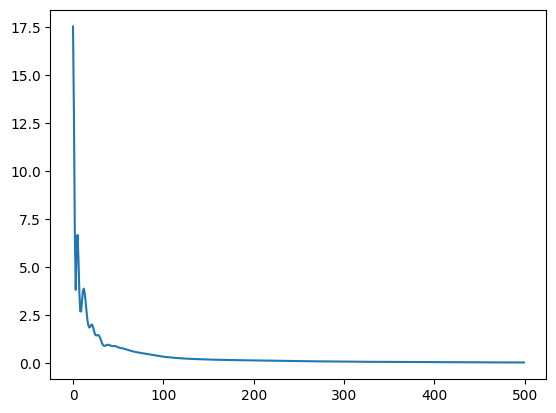

In [14]:
# Grafico la curva de perdida
import matplotlib.pyplot as plt
plt.plot(mlp.loss_curve_)
plt.show()

In [15]:
#PRedecimos con dataset de test
pred = mlp.predict(x_test)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [16]:
#Metricas de Evaluacion
confusion_matrix(y_test,pred)

array([[24,  7],
       [ 6, 23]], dtype=int64)

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.77      0.79      0.78        29

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

